In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("SalaryData_train.csv")
data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.shape

(30161, 14)

In [4]:
data.duplicated().value_counts()

False    26903
True      3258
dtype: int64

In [5]:
df=data.drop_duplicates()
df.shape

(26903, 14)

In [6]:
df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
df.info

<bound method DataFrame.info of        age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
30154   53            Private        Masters           14   
30155   22            Private   Some-college           10   
30156   27            Private     Assoc-acdm           12   
30158   58            Private        HS-grad            9   
30160   52       Self-emp-inc        HS-grad            9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2            

In [8]:
df.corr

<bound method DataFrame.corr of        age          workclass      education  educationno  \
0       39          State-gov      Bachelors           13   
1       50   Self-emp-not-inc      Bachelors           13   
2       38            Private        HS-grad            9   
3       53            Private           11th            7   
4       28            Private      Bachelors           13   
...    ...                ...            ...          ...   
30154   53            Private        Masters           14   
30155   22            Private   Some-college           10   
30156   27            Private     Assoc-acdm           12   
30158   58            Private        HS-grad            9   
30160   52       Self-emp-inc        HS-grad            9   

             maritalstatus          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2            

<AxesSubplot:>

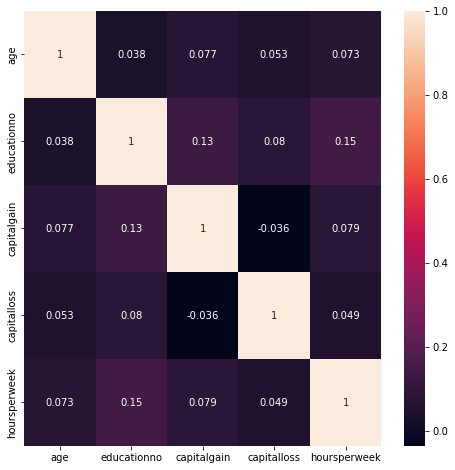

In [9]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [10]:
df['age'].unique(),df['age'].value_counts()

(array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 34, 25, 43, 40,
        54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 47, 46,
        36, 79, 27, 18, 33, 76, 55, 61, 70, 64, 71, 66, 51, 58, 26, 17, 60,
        90, 75, 65, 77, 62, 63, 67, 74, 72, 69, 68, 73, 81, 78, 88, 80, 84,
        83, 85, 82, 86], dtype=int64),
 31    769
 36    757
 33    748
 34    743
 37    740
      ... 
 82      7
 83      5
 88      3
 85      3
 86      1
 Name: age, Length: 72, dtype: int64)

In [11]:
df['workclass'].unique(),df['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             19213
  Self-emp-not-inc     2431
  Local-gov            2014
  State-gov            1253
  Self-emp-inc         1049
  Federal-gov           929
  Without-pay            14
 Name: workclass, dtype: int64)

In [12]:
df['education'].unique(),df['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
  HS-grad         8268
  Some-college    5893
  Bachelors       4503
  Masters         1558
  Assoc-voc       1256
  Assoc-acdm       994
  11th             941
  10th             770
  7th-8th          541
  Prof-school      532
  9th              449
  Doctorate        364
  12th             358
  5th-6th          283
  1st-4th          149
  Preschool         44
 Name: education, dtype: int64)

In [13]:
df['workclass'].unique(),df['workclass'].value_counts()

(array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
  Private             19213
  Self-emp-not-inc     2431
  Local-gov            2014
  State-gov            1253
  Self-emp-inc         1049
  Federal-gov           929
  Without-pay            14
 Name: workclass, dtype: int64)

In [14]:
df['education'].unique(),df['education'].value_counts()

(array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
        ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
        ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
        ' 12th', ' 1st-4th'], dtype=object),
  HS-grad         8268
  Some-college    5893
  Bachelors       4503
  Masters         1558
  Assoc-voc       1256
  Assoc-acdm       994
  11th             941
  10th             770
  7th-8th          541
  Prof-school      532
  9th              449
  Doctorate        364
  12th             358
  5th-6th          283
  1st-4th          149
  Preschool         44
 Name: education, dtype: int64)

In [15]:
df['maritalstatus'].unique(),df['maritalstatus'].value_counts()

(array([' Never-married', ' Married-civ-spouse', ' Divorced',
        ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
        ' Widowed'], dtype=object),
  Married-civ-spouse       12371
  Never-married             8387
  Divorced                  4009
  Separated                  928
  Widowed                    817
  Married-spouse-absent      370
  Married-AF-spouse           21
 Name: maritalstatus, dtype: int64)

In [16]:
df['occupation'].unique(),df['occupation'].value_counts()

(array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repair', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
  Prof-specialty       3783
  Exec-managerial      3646
  Adm-clerical         3291
  Craft-repair         3229
  Sales                3205
  Other-service        2914
  Machine-op-inspct    1665
  Transport-moving     1420
  Handlers-cleaners    1159
  Farming-fishing       957
  Tech-support          858
  Protective-serv       626
  Priv-house-serv       141
  Armed-Forces            9
 Name: occupation, dtype: int64)

In [17]:
df['relationship'].unique(),df['relationship'].value_counts()

(array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
        ' Other-relative'], dtype=object),
  Husband           10809
  Not-in-family      7115
  Own-child          3655
  Unmarried          3086
  Wife               1366
  Other-relative      872
 Name: relationship, dtype: int64)

In [18]:
df['race'].unique(),df['race'].value_counts()

(array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
        ' Other'], dtype=object),
  White                 22758
  Black                  2734
  Asian-Pac-Islander      894
  Amer-Indian-Eskimo      286
  Other                   231
 Name: race, dtype: int64)

In [19]:
df['native'].unique(),df['native'].value_counts()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary'], dtype=object),
  United-States                 24259
  Mexico                          600
  Philippines                     188
  Germany                         128
  Puerto-Rico                     109
  Canada                          107
  India                           100
  El-Salvador                     100
  Cuba                             92
  England                          86
  Jamaica       

In [20]:
label_encoder=preprocessing.LabelEncoder()
df['maritalstatus']=label_encoder.fit_transform(df['maritalstatus'])
df['age']=label_encoder.fit_transform(df['age'])
df['workclass']=label_encoder.fit_transform(df['workclass'])
df['education']=label_encoder.fit_transform(df['education'])
df['occupation']=label_encoder.fit_transform(df['occupation'])
df['relationship']=label_encoder.fit_transform(df['relationship'])
df['race']=label_encoder.fit_transform(df['race'])
df['sex']=label_encoder.fit_transform(df['sex'])
df['native']=label_encoder.fit_transform(df['native'])

C:\Users\Ranjitsinh\AppData\Local\Temp\ipykernel_6104\284345753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['maritalstatus']=label_encoder.fit_transform(df['maritalstatus'])
C:\Users\Ranjitsinh\AppData\Local\Temp\ipykernel_6104\284345753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=label_encoder.fit_transform(df['age'])
C:\Users\Ranjitsinh\AppData\Local\Temp\ipykernel_6104\284345753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [21]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,33,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,21,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,36,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,11,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,36,2,12,14,2,3,0,4,1,0,0,40,37,>50K
30155,5,2,15,10,4,10,1,4,1,0,0,40,37,<=50K
30156,10,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30158,41,2,11,9,6,0,4,4,0,0,0,40,37,<=50K


In [22]:
df1=pd.read_csv("SalaryData_test.csv")
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

columns=["workclass","education","maritalstatus","occupation","relationship","race","sex","native"]

In [24]:
for i in columns:
 df1[i]=label_encoder.fit_transform(df1[i])
 df1   

In [25]:
df1

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


In [26]:
x_train=df.iloc[:,0:13]
y_train=df['Salary']
x_test=df1.iloc[:,0:13]
y_test=df1['Salary']

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((26903, 13), (15060, 13), (26903,), (15060,))

# Applying Naive Bayes(Multinomial) for classification

In [28]:
from sklearn.naive_bayes import MultinomialNB as MB
# Multinomial Naive Bayes

# Model Train
classifier_mb = MB()

classifier_mb.fit(x_train, y_train)

# Model Test

# Model Accuracy on train set
train_pred_m = classifier_mb.predict(x_train)
accuracy_train_m = np.mean(train_pred_m==y_train) 

# Model Accuracy on test set
test_pred_m = classifier_mb.predict(x_test)
accuracy_test_m = np.mean(test_pred_m==y_test) 

In [29]:
accuracy_train_m

0.7683158012117608

In [30]:
test_pred_m

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [31]:
accuracy_test_m

0.7749667994687915

# Accuracy for Train as well Test data is almost equal for Multinomial Naive Bayes

# Applying Naive Bayes(Gaussian) for classification

In [32]:
from sklearn.naive_bayes import GaussianNB as GB
# Multinomial Naive Bayes

# Model Train
classifier_mb = GB()

classifier_mb.fit(x_train, y_train)

# Model Test

# Model Accuracy on train set
train_pred_g = classifier_mb.predict(x_train)
accuracy_train_g = np.mean(train_pred_m==y_train) 

# Model Accuracy on test set
test_pred_g = classifier_mb.predict(x_test)
accuracy_test_g = np.mean(test_pred_m==y_test) 

In [33]:
accuracy_train_g

0.7683158012117608

In [34]:
test_pred_g

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
accuracy_test_g

0.7749667994687915

# Applying Naive Bayes(Bernoulli) for classification

In [36]:
from sklearn.naive_bayes import BernoulliNB as nb
# Multinomial Naive Bayes

# Model Train
classifier_mb = nb()

classifier_mb.fit(x_train, y_train)

# Model Test

# Model Accuracy on train set
train_pred_n = classifier_mb.predict(x_train)
accuracy_train_n= np.mean(train_pred_m==y_train) 

# Model Accuracy on test set
test_pred_n = classifier_mb.predict(x_test)
accuracy_test_n = np.mean(test_pred_m==y_test) 

In [37]:
accuracy_train_n

0.7683158012117608

In [38]:
test_pred_n

array([' <=50K', ' >50K', ' >50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [39]:
accuracy_test_n

0.7749667994687915

# so by doing 3 algorithms it gives us equal accuracy